In [169]:
import pandas as pd
import numpy as np
#date = '2019-12-20_21'
date = 'noProxy/All'
root_dir = '/Users/Leo/Documents/github/GradProj/'
train_path = root_dir + 'Experiment/MarkovModel/CsvFile/' + date + '/train_15_0.8.csv'
test_path = root_dir + 'Experiment/MarkovModel/CsvFile/' + date + '/test_15_0.8.csv'
train_df = pd.read_csv(train_path,index_col=0)
test_df = pd.read_csv(test_path,index_col=0)
print('end2')

end2


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score

%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

                    precision    recall        f1
LogisticRegression   0.447211  0.447211  0.447211
SVM                  0.451245  0.451245  0.451245
GaussianNB           0.371946  0.371946  0.371946
tree                 0.623329  0.623329  0.623329
RandomForest         0.626095  0.626095  0.626095


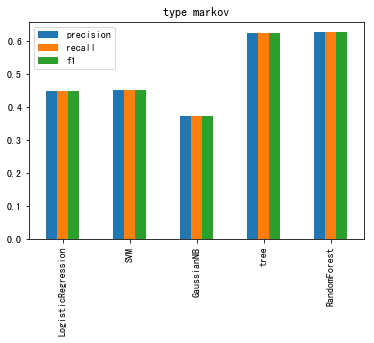

In [171]:
#type markov
x_train = train_df.iloc[:,0:5].values.copy()
y_train = train_df['label'].values.copy()
x_test = test_df.iloc[:,0:5].values.copy()
y_test = test_df['label'].values.copy()
lr_classifer = LogisticRegression()
lr_classifer.fit(x_train, y_train)
y_pred = lr_classifer.predict(x_test)
lr_precision = precision_score(y_test, y_pred, average='micro')
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')

svm_classifer = SVC()
svm_classifer.fit(x_train, y_train)
y_pred = svm_classifer.predict(x_test)
svm_precision = precision_score(y_test, y_pred, average='micro')
svm_recall = recall_score(y_test, y_pred, average='micro')
svm_f1 = f1_score(y_test, y_pred, average='micro')

gn_classifer = GaussianNB()
gn_classifer.fit(x_train, y_train)
y_pred = gn_classifer.predict(x_test)
gn_precision = precision_score(y_test, y_pred, average='micro')
gn_recall = recall_score(y_test, y_pred, average='micro')
gn_f1 = f1_score(y_test, y_pred, average='micro')

tr_classifer = tree.DecisionTreeClassifier()
tr_classifer.fit(x_train, y_train)
y_pred = tr_classifer.predict(x_test)
tr_precision = precision_score(y_test, y_pred, average='micro')
tr_recall = recall_score(y_test, y_pred, average='micro')
tr_f1 = f1_score(y_test, y_pred, average='micro')

rf_classifer = RandomForestClassifier()
rf_classifer.fit(x_train, y_train)
y_pred = rf_classifer.predict(x_test)
rf_precision = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')

score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
score_df.loc['LogisticRegression'] = [lr_precision, lr_recall, lr_f1]
score_df.loc['SVM'] = [svm_precision, svm_recall, svm_f1]
score_df.loc['GaussianNB'] = [gn_precision, gn_recall, gn_f1]
score_df.loc['tree'] = [tr_precision, tr_recall, tr_f1]
score_df.loc['RandomForest'] = [rf_precision, rf_recall, rf_f1]
print(score_df)
ax = score_df.plot.bar(title='type markov')
fig = ax.get_figure()
#fig.savefig('../figure/type.svg')

In [172]:
#type+length markov


def classify(classifer, name):
    f1_score_list = list()
    recall_score_list = list()
    precision_score_list = list()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    precision_score_list.append(precision_score(y_test, y_pred, average=None))
    recall_score_list.append(recall_score(y_test, y_pred, average=None))
    f1_score_list.append(f1_score(y_test, y_pred, average=None))
    scores = [np.mean(precision_score_list, axis=0), np.mean(recall_score_list, axis=0), np.mean(f1_score_list, axis=0)]
    print(name + ": ")
    for score in scores:
        print(score)
    print(np.mean(np.mean(precision_score_list, axis=0)))
    print(np.mean(np.mean(recall_score_list, axis=0)))
    print(np.mean(np.mean(f1_score_list, axis=0)))
    
    
x_train = train_df.iloc[:,0:15].values.copy()
y_train = train_df['label'].values.copy()
x_test = test_df.iloc[:,0:15].values.copy()
y_test = test_df['label'].values.copy()


classifer = LogisticRegression()
classify(classifer, "LogisticRegression")

classifer = SVC()
classify(classifer, "SVM")

classifer = GaussianNB()
classify(classifer, "GaussianNB")

classifer =  tree.DecisionTreeClassifier()
classify(classifer, "DecisionTree")

classifer = RandomForestClassifier()
classify(classifer, "RandomForest")



LogisticRegression: 
[ 0.81011609  0.86749717  0.9655914   0.46787479  0.75154004  0.72459016
  0.79276018  0.80684327  0.95348837  0.94557097]
[ 0.92782526  0.91408115  0.90707071  0.52592593  0.4187643   0.88844221
  0.89296636  0.73246493  0.95571096  0.848659  ]
[ 0.86498451  0.89018013  0.93541667  0.49520488  0.53783982  0.79819413
  0.83988495  0.76785714  0.95459837  0.89449773]
0.808587244328
0.801191080311
0.797865832655
SVM: 
[ 0.85129118  0.8948626   0.91411043  0.4501992   0.43452958  0.62978723
  0.80304472  0.80848749  0.96424315  0.95048439]
[ 0.90788224  0.89379475  0.9030303   0.62777778  0.51258581  0.44623116
  0.86034659  0.74448898  0.94289044  0.84578544]
[ 0.87867647  0.89432836  0.90853659  0.52436195  0.47034121  0.52235294
  0.83070866  0.77516954  0.95344726  0.89508363]
0.770103998261
0.768481348614
0.765300659766
GaussianNB: 
[ 0.76221198  0.76582278  0.86720322  0.2641844   0.36886633  0.83389831
  0.84943538  0.78398983  0.83895539  0.82690406]
[ 0.78537

In [173]:
#type+burst markov
x_train = np.append(train_df.iloc[:,0:5].values.copy(), train_df.iloc[:,10:15].values.copy(), axis = 1)
y_train = train_df['label'].values.copy()
x_test = np.append(test_df.iloc[:,0:5].values.copy(), test_df.iloc[:,10:15].values.copy(), axis = 1)
y_test = test_df['label'].values.copy()


lr_classifer = LogisticRegression()
lr_classifer.fit(x_train, y_train)
y_pred = lr_classifer.predict(x_test)
lr_precision = precision_score(y_test, y_pred, average='micro')
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')

svm_classifer = SVC()
svm_classifer.fit(x_train, y_train)
y_pred = svm_classifer.predict(x_test)
svm_precision = precision_score(y_test, y_pred, average='micro')
svm_recall = recall_score(y_test, y_pred, average='micro')
svm_f1 = f1_score(y_test, y_pred, average='micro')

gn_classifer = GaussianNB()
gn_classifer.fit(x_train, y_train)
y_pred = gn_classifer.predict(x_test)
gn_precision = precision_score(y_test, y_pred, average='micro')
gn_recall = recall_score(y_test, y_pred, average='micro')
gn_f1 = f1_score(y_test, y_pred, average='micro')

tr_classifer = tree.DecisionTreeClassifier()
tr_classifer.fit(x_train, y_train)
y_pred = tr_classifer.predict(x_test)
tr_precision = precision_score(y_test, y_pred, average='micro')
tr_recall = recall_score(y_test, y_pred, average='micro')
tr_f1 = f1_score(y_test, y_pred, average='micro')

rf_classifer = RandomForestClassifier()
rf_classifer.fit(x_train, y_train)
y_pred = rf_classifer.predict(x_test)
rf_precision = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')

score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
score_df.loc['LogisticRegression'] = [lr_precision, lr_recall, lr_f1]
score_df.loc['SVM'] = [svm_precision, svm_recall, svm_f1]
score_df.loc['GaussianNB'] = [gn_precision, gn_recall, gn_f1]
score_df.loc['tree'] = [tr_precision, tr_recall, tr_f1]
score_df.loc['RandomForest'] = [rf_precision, rf_recall, rf_f1]
print(score_df)
#ax = score_df.plot.bar(title='type+length markov')
#fig = ax.get_figure()
#fig.savefig('../figure/type_length.svg')
#print(score_df.loc['RandomForest']) 

                    precision    recall        f1
LogisticRegression   0.767174  0.767174  0.767174
SVM                  0.759451  0.759451  0.759451
GaussianNB           0.657561  0.657561  0.657561
tree                 0.837137  0.837137  0.837137
RandomForest         0.843707  0.843707  0.843707


In [174]:

x_train = train_df.iloc[:,0:10].values.copy()
y_train = train_df['label'].values.copy()
x_test = test_df.iloc[:,0:15].values.copy()
y_test = test_df['label'].values.copy()

x1_train = np.append(train_df.iloc[:,0:5].values.copy(), train_df.iloc[:,10:15].values.copy(), axis = 1)
y1_train = train_df['label'].values.copy()

print(x_train[10])
print(x1_train[10])

[ 0.83686527  0.72249169  0.65245721  0.71014108  0.63185015  0.69424787
  0.68489078  0.52464035  0.82587551  0.84851884]
[ 0.83686527  0.72249169  0.65245721  0.71014108  0.63185015  0.42307153
  0.          0.15176948  0.          0.        ]


                    precision    recall        f1
LogisticRegression   0.509336  0.509336  0.509336
SVM                  0.501153  0.501153  0.501153
GaussianNB           0.413439  0.413439  0.413439
tree                 0.624020  0.624020  0.624020
RandomForest         0.627593  0.627593  0.627593


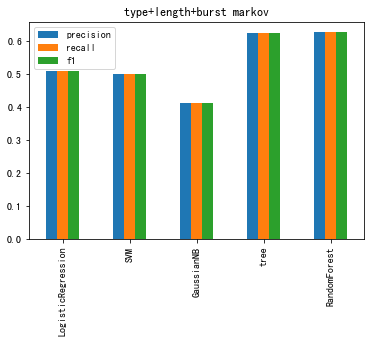

In [175]:
#type+length markov
x_train = train_df.iloc[:,0:10].values.copy()
y_train = train_df['label'].values.copy()
x_test = test_df.iloc[:,0:10].values.copy()
y_test = test_df['label'].values.copy()


# x_test = np.append(test_df.iloc[:,0:5].values.copy(), test_df.iloc[:,5:10].values.copy(), axis = 1)
# y_test = test_df['label'].values.copy()

def my_pred(y_pred, y_test, proba):
    y_pred1 = list()
    y_test1 = list()
    [rows, clos] = proba.shape
    print([rows, clos])
    for i in range(rows):
        temp = max(proba[i])
        if temp < 0.5:
            continue
        y_pred1.append(y_pred[i])
        y_test1.append(y_test[i])
    f1 = f1_score(y_test1, y_pred1, average=None)
    recall = recall_score(y_test1, y_pred1, average=None)
    precision = precision_score(y_test1, y_pred1, average=None)
    print(precision)
    print(recall)
    print(f1)
    print(np.mean(precision))
    print(np.mean(recall))
    print(np.mean(f1))
    print(str(len(y_test)) + ": " + str(len(y_test1)) + ": " + str(len(y_test1) / len(y_test)))
    

lr_classifer = LogisticRegression()
lr_classifer.fit(x_train, y_train)
y_pred = lr_classifer.predict(x_test)
lr_precision = precision_score(y_test, y_pred, average='micro')
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')

svm_classifer = SVC()
svm_classifer.fit(x_train, y_train)
y_pred = svm_classifer.predict(x_test)
svm_precision = precision_score(y_test, y_pred, average='micro')
svm_recall = recall_score(y_test, y_pred, average='micro')
svm_f1 = f1_score(y_test, y_pred, average='micro')

gn_classifer = GaussianNB()
gn_classifer.fit(x_train, y_train)
y_pred = gn_classifer.predict(x_test)
gn_precision = precision_score(y_test, y_pred, average='micro')
gn_recall = recall_score(y_test, y_pred, average='micro')
gn_f1 = f1_score(y_test, y_pred, average='micro')

tr_classifer = tree.DecisionTreeClassifier()
tr_classifer.fit(x_train, y_train)
y_pred = tr_classifer.predict(x_test)
tr_precision = precision_score(y_test, y_pred, average='micro')
tr_recall = recall_score(y_test, y_pred, average='micro')
tr_f1 = f1_score(y_test, y_pred, average='micro')


rf_classifer = RandomForestClassifier()
rf_classifer.fit(x_train, y_train)
y_pred = rf_classifer.predict(x_test)
proba = rf_classifer.predict_proba(x_test)
#my_pred(y_pred, y_test, proba)


rf_precision = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')
score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
score_df.loc['LogisticRegression'] = [lr_precision, lr_recall, lr_f1]
score_df.loc['SVM'] = [svm_precision, svm_recall, svm_f1]
score_df.loc['GaussianNB'] = [gn_precision, gn_recall, gn_f1]
score_df.loc['tree'] = [tr_precision, tr_recall, tr_f1]
score_df.loc['RandomForest'] = [rf_precision, rf_recall, rf_f1]
ax = score_df.plot.bar(title='type+length+burst markov')
fig = ax.get_figure()
print(score_df)
fig.savefig('type_length_burst.svg')

                    precision    recall        f1
LogisticRegression   0.811319  0.811319  0.811319
SVM                  0.767865  0.767865  0.767865
GaussianNB           0.683956  0.683956  0.683956
tree                 0.826418  0.826418  0.826418
RandomForest         0.850161  0.850161  0.850161


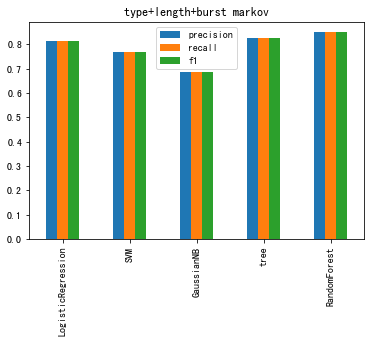

In [176]:
#type+length+burst markov
x_train = train_df.iloc[:,0:15].values.copy()
y_train = train_df['label'].values.copy()
x_test = test_df.iloc[:,0:15].values.copy()
y_test = test_df['label'].values.copy()


# x_test = np.append(test_df.iloc[:,0:5].values.copy(), test_df.iloc[:,5:10].values.copy(), axis = 1)
# y_test = test_df['label'].values.copy()

def my_pred(y_pred, y_test, proba):
    y_pred1 = list()
    y_test1 = list()
    [rows, clos] = proba.shape
    print([rows, clos])
    for i in range(rows):
        temp = max(proba[i])
        if temp < 0.5:
            continue
        y_pred1.append(y_pred[i])
        y_test1.append(y_test[i])
    f1 = f1_score(y_test1, y_pred1, average=None)
    recall = recall_score(y_test1, y_pred1, average=None)
    precision = precision_score(y_test1, y_pred1, average=None)
    print(precision)
    print(recall)
    print(f1)
    print(np.mean(precision))
    print(np.mean(recall))
    print(np.mean(f1))
    print(str(len(y_test)) + ": " + str(len(y_test1)) + ": " + str(len(y_test1) / len(y_test)))
    

lr_classifer = LogisticRegression()
lr_classifer.fit(x_train, y_train)
y_pred = lr_classifer.predict(x_test)
lr_precision = precision_score(y_test, y_pred, average='micro')
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')

svm_classifer = SVC()
svm_classifer.fit(x_train, y_train)
y_pred = svm_classifer.predict(x_test)
svm_precision = precision_score(y_test, y_pred, average='micro')
svm_recall = recall_score(y_test, y_pred, average='micro')
svm_f1 = f1_score(y_test, y_pred, average='micro')

gn_classifer = GaussianNB()
gn_classifer.fit(x_train, y_train)
y_pred = gn_classifer.predict(x_test)
gn_precision = precision_score(y_test, y_pred, average='micro')
gn_recall = recall_score(y_test, y_pred, average='micro')
gn_f1 = f1_score(y_test, y_pred, average='micro')

tr_classifer = tree.DecisionTreeClassifier()
tr_classifer.fit(x_train, y_train)
y_pred = tr_classifer.predict(x_test)
tr_precision = precision_score(y_test, y_pred, average='micro')
tr_recall = recall_score(y_test, y_pred, average='micro')
tr_f1 = f1_score(y_test, y_pred, average='micro')


rf_classifer = RandomForestClassifier()
rf_classifer.fit(x_train, y_train)
y_pred = rf_classifer.predict(x_test)
proba = rf_classifer.predict_proba(x_test)
#my_pred(y_pred, y_test, proba)


rf_precision = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')
score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
score_df.loc['LogisticRegression'] = [lr_precision, lr_recall, lr_f1]
score_df.loc['SVM'] = [svm_precision, svm_recall, svm_f1]
score_df.loc['GaussianNB'] = [gn_precision, gn_recall, gn_f1]
score_df.loc['tree'] = [tr_precision, tr_recall, tr_f1]
score_df.loc['RandomForest'] = [rf_precision, rf_recall, rf_f1]
ax = score_df.plot.bar(title='type+length+burst markov')
fig = ax.get_figure()
print(score_df)
fig.savefig('type_length_burst.svg')